# 机器实战----决策树

In [3]:
# 数据集
def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    #change to discrete values
    return dataSet, labels

In [7]:
dataSet,labels=createDataSet()
print(dataSet,labels)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']] ['no surfacing', 'flippers']


In [47]:
#计算数据集的熵
from math import log
import operator
def calcShannonEnt(dataSet):
    numEntries=len(dataSet)
    labelCounts={}
    for featVec in dataSet:
        currentLabel=featVec[-1]
        #print("currentLabel",currentLabel)#标签
        #print("keys",labelCounts.keys())# 获得字典key值
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1
        shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob, 2) #log base 2
    return shannonEnt

In [17]:
shannonEnt=calcShannonEnt(dataSet)
shannonEnt

currentLabel yes
keys dict_keys([])
currentLabel yes
keys dict_keys(['yes'])
currentLabel no
keys dict_keys(['yes'])
currentLabel no
keys dict_keys(['no', 'yes'])
currentLabel no
keys dict_keys(['no', 'yes'])


0.9709505944546686

# 
 熵越大，则混合的数据也就越多

In [18]:
# 测试熵的变化
dataSet[0][-1]='maybe'
dataSet

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [20]:
shannonEnt1=calcShannonEnt(dataSet)
shannonEnt1

currentLabel maybe
keys dict_keys([])
currentLabel yes
keys dict_keys(['maybe'])
currentLabel no
keys dict_keys(['maybe', 'yes'])
currentLabel no
keys dict_keys(['no', 'maybe', 'yes'])
currentLabel no
keys dict_keys(['no', 'maybe', 'yes'])


1.3709505944546687

## 信息增益
根据《统计学习方法》中，对信息增益有如下定义：
    特征A对训练数据集D的信息增益为g（D，A）,定义集合D的经验熵H(D)与特征A在给定条件下D的经验条件熵H(D|A)之差，即 g(D,A)=H(D)-H(D|A)
   
因此，可根据获取最大信息增益的方法划分数据集

In [48]:
#按照给定特征划分数据集

def splitDataSet(dataSet,axis,value):
    # dataSet 待划分的数据集，axis：划分数据集的特征，value：特征返回值
    retDataSet=[]
    for featVec in dataSet:
        #print("111",axis,featVec,featVec[axis])
        if featVec[axis]==value:
            #print("数据集特征:",featVec[:axis])
            reducedFeatVec=featVec[:axis]
            #print("特征返回值:",featVec[axis+1:])
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [37]:
myDat,labels=createDataSet()
print(myDat,labels)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']] ['no surfacing', 'flippers']


In [33]:
retDataSet=splitDataSet(myDat,0,1)
retDataSet

数据集特征: []
特征返回值: [1, 'yes']
数据集特征: []
特征返回值: [1, 'yes']
数据集特征: []
特征返回值: [0, 'no']


[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [58]:
# 寻找最佳数据集的划分方式
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1      #the last column is used for the labels
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):        #iterate over all the features
        #featList = [example[i] for example in dataSet]#create a list of all the examples of this feature
        featList=[]
        for example in dataSet:
            #print("example",example,example[i])
            featList.append(example[i])
        uniqueVals = set(featList)       #get a set of unique values
        #print("unique",uniqueVals)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy     #calculate the info gain; ie reduction in entropy
        if (infoGain > bestInfoGain):       #compare this to the best gain so far
            bestInfoGain = infoGain         #if better than current best, set to best
            bestFeature = i
    return bestFeature   
        
            

In [53]:
mydat,labels=createDataSet()
print(mydat)
bestFeat=chooseBestFeatureToSplit(mydat)
bestFeat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
example [1, 1, 'yes'] 1
example [1, 1, 'yes'] 1
example [1, 0, 'no'] 1
example [0, 1, 'no'] 0
example [0, 1, 'no'] 0
unique {0, 1}
example [1, 1, 'yes'] 1
example [1, 1, 'yes'] 1
example [1, 0, 'no'] 0
example [0, 1, 'no'] 1
example [0, 1, 'no'] 1
unique {0, 1}


0

In [55]:
# 构建决策树
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if  vote not in classCount.keys():
            calssCount[vote]=0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]  # 返回最大值
    

In [61]:
# 构建决策树
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]#得到的是标签
    if classList.count(classList[0]) == len(classList):
        return classList[0]#stop splitting when all of the classes are equal
    if len(dataSet[0]) == 1: #stop splitting when there are no more features in dataSet
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet) #最佳特征
    print("best",bestFeat)
    bestFeatLabel = labels[bestFeat]# 最佳特征标签
    print("bestFeatLabel",bestFeatLabel)
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]       #copy all of labels, so trees don't mess up existing labels
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree

In [62]:
mydat,labels=createDataSet()
print(mydat)
mytree=createTree(mydat, labels)
mytree

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
best 0
bestFeatLabel no surfacing
best 0
bestFeatLabel flippers


{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [72]:
# 在Matplotlib中注解绘制树形图
import matplotlib.pyplot as plt
% matplotlib inline
decisionNode=dict(boxstyle="sawtooth",fc="0.8")
leafNode=dict(boxstyle="round4",fc="0.9")
arrow_args=dict(arrowstyle="<-")
def plotNode(nodeText,centerPt,parentPt,nodeType):
             createPlot.ax1.annotate(nodeText, xy=parentPt, xycoords='axes fraction',
                            xytext=centerPt, textcoords='axes fraction',
                            va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)

In [71]:
def createPlot():
    
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses
    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

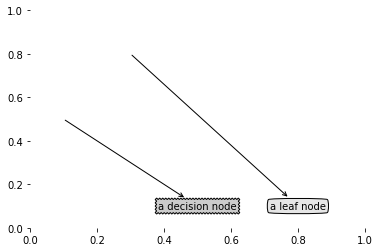

In [73]:
createPlot()

# 构造注解树


In [82]:
# 获取叶节点和树的层数
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree)[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys(): #递归寻找叶子节点
        #print("se",secondDict[key])
        if type(secondDict[key]).__name__ == 'dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            numLeafs += getNumLeafs(secondDict[key])
        else: numLeafs += 1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree)[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else: thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

In [77]:
def retrieveTree(i):
    listOfTrees = [{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                   {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]
mytree=retrieveTree(1)
mytree

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [78]:
#查看叶子点数
leaf=getNumLeafs(mytree)
leaf

se no
se {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}
se {'head': {0: 'no', 1: 'yes'}}
se no
se yes
se no


4

In [79]:
# 查看深度
treedepth=getTreeDepth(mytree)
treedepth

3

In [83]:
import matplotlib.pyplot as plt
% matplotlib inline
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = list(myTree)[0]     #the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            plotTree(secondDict[key], cntrPt, str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
    
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()

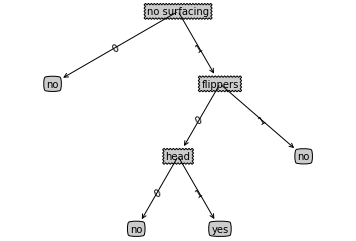

In [84]:
myTree=createPlot(mytree)

In [85]:
# 测试算法
def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree)[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    if isinstance(valueOfFeat, dict):
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else: classLabel = valueOfFeat
    return classLabel

In [87]:
mydat,labels=createDataSet()
print(mydat,labels)
mytree=retrieveTree(0)
classLabes=classify(mytree, labels, [1,1])
classLabes

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']] ['no surfacing', 'flippers']


'yes'

In [88]:
#决策树的保存
def storeTree(inputTree, filename):
    import pickle
    fw = open(filename, 'wb')
    pickle.dump(inputTree, fw)
    fw.close()

def grabTree(filename):
    import pickle
    fr = open(filename, 'rb')
    return pickle.load(fr)


In [89]:
storeTree(mytree, 'classStore.txt')

In [90]:
trr=grabTree('classStore.txt')
trr

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

# 使用决策树预测隐形眼镜类型

In [91]:
with open('lenses.txt','r') as f:
    lenses=[inst.strip().split('\t') for inst in f.readlines()]
    lensesLabels=['age','prescript','astigmatic','tearRate']
    lensesTree=createTree(lenses,lensesLabels)
lensesTree
    

best 3
bestFeatLabel tearRate
best 2
bestFeatLabel astigmatic
best 0
bestFeatLabel age
best 0
bestFeatLabel prescript
best 1
bestFeatLabel prescript
best 0
bestFeatLabel age


{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

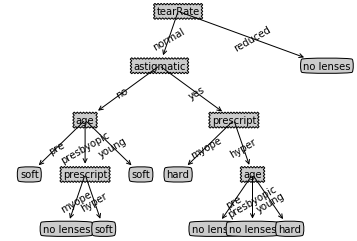

In [92]:
createPlot(lensesTree)